Project 1 Overview:



In [108]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from api_keys import gkey
from pprint import pprint
import gmaps.datasets
import os
import requests
import json
#import pycountry



In [109]:
gmaps.configure(gkey)

In [110]:
# Reading in Data Set
wine_data = "Resources/white-wine-price-rating.csv"

In [111]:
wine_data = pd.read_csv(wine_data)
wine_data.head()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351


General Analysis
- Wine Data Count - wine_data.count()
- Dropping NA
- Removing Duplicates
- Did nUnique to find unqique values qty of the of Regions


In [112]:
wine_data.count()

FullName                   4594
Winery                     4594
WineName                   4594
Year                       4594
Region                     4217
RegionalVariety            4217
VintageRating              4594
VintageRatingCount         4594
WineRating                 4594
WineRatingCount            4594
VintagePrice               4594
WinePrice                  4594
VintageRatingPriceRatio    4594
WineRatingPriceRatio       4594
dtype: int64

In [113]:
#Dropping lines with incomplete information.
wine_clean_data = wine_data.dropna(how="any")
wine_clean_data.count()

FullName                   4217
Winery                     4217
WineName                   4217
Year                       4217
Region                     4217
RegionalVariety            4217
VintageRating              4217
VintageRatingCount         4217
WineRating                 4217
WineRatingCount            4217
VintagePrice               4217
WinePrice                  4217
VintageRatingPriceRatio    4217
WineRatingPriceRatio       4217
dtype: int64

In [114]:
#Removed Duplicates
wine_clean_data = wine_clean_data.drop_duplicates(keep = 'first')
wine_clean_data
#wine_clean_data= wine_clean_data.drop_duplicates(subset=['FullName'])
#wine_clean_data.count()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [115]:
wine_clean_data["Lat"]= ""
wine_clean_data["Lon"]= ""
#wine_clean_data["Address"]= ""
#wine_clean_data["Country"]= ""
wine_clean_data.head(25)



,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351,,
5,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2009,Burgundy,Côte de Beaune White,4.8,35,4.7,454,4022.800,4022.800,0.001193,0.001168,,
6,Keller G-Max Riesling 2009,Keller,G-Max Riesling,2009,German,Riesling,4.8,37,4.7,209,2420.000,2420.000,0.001983,0.001942,,
7,Château Haut-Brion Pessac-Léognan Blanc (Grand...,Château Haut-Brion,Pessac-Léognan Blanc (Grand Cru Classé de Graves),2005,Bordeaux,White,4.8,39,4.5,820,864.000,864.000,0.005556,0.005208,,
8,Domaine de La Romanée-Conti Montrachet Grand C...,Domaine de La Romanée-Conti,Montrachet Grand Cru,2010,Burgundy,Côte de Beaune White,4.8,43,4.7,1348,7249.110,7249.110,0.000662,0.000648,,
9,Domaine de La Romanée-Conti Montrachet Grand C...,Domaine de La Romanée-Conti,Montrachet Grand Cru,2014,Burgundy,Côte de Beaune White,4.8,43,4.7,1348,5419.190,5419.190,0.000886,0.000867,,


In [116]:
wine_clean_data.nunique()

FullName                   4216
Winery                     1081
WineName                   1716
Year                         33
Region                       32
RegionalVariety              31
VintageRating                11
VintageRatingCount          537
WineRating                   13
WineRatingCount            1237
VintagePrice               1888
WinePrice                  1888
VintageRatingPriceRatio    2918
WineRatingPriceRatio       2801
Lat                           1
Lon                           1
dtype: int64

In [117]:
wine_data_regions_nodupes_df= wine_clean_data.drop_duplicates(subset=['Region'])
wine_data_regions_nodupes_df.head(20)

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,
6,Keller G-Max Riesling 2009,Keller,G-Max Riesling,2009,German,Riesling,4.8,37,4.7,209,2420.000,2420.000,0.001983,0.001942,,
7,Château Haut-Brion Pessac-Léognan Blanc (Grand...,Château Haut-Brion,Pessac-Léognan Blanc (Grand Cru Classé de Graves),2005,Bordeaux,White,4.8,39,4.5,820,864.000,864.000,0.005556,0.005208,,
15,F.X. Pichler Unendlich Riesling 2017,F.X. Pichler,Unendlich Riesling,2017,Austrian,Riesling,4.9,49,4.7,489,207.170,207.170,0.023652,0.022687,,
17,Marqués de Murrieta Castillo Ygay Gran Reserva...,Marqués de Murrieta,Castillo Ygay Gran Reserva Especial Blanco,1986,Spanish,Rioja White,4.7,277,4.6,1341,599.000,599.000,0.007846,0.007679,,
18,La Grange des Pères Vin de Pays de l'Hérault B...,La Grange des Pères,Vin de Pays de l'Hérault Blanc,2014,Languedoc-Roussillon,White,4.5,90,4.5,632,223.000,223.000,0.020179,0.020179,,
24,Ornellaia Toscana Bianco 2015,Ornellaia,Toscana Bianco,2015,Central Italy,White,4.2,57,4.4,279,226.000,226.000,0.018584,0.019469,,
30,Quintarelli Giuseppe Veneto Amabile del Cere P...,Quintarelli Giuseppe,Veneto Amabile del Cere Passito Bianco,2003,Northern Italy,White,4.7,66,4.6,184,377.400,377.400,0.012454,0.012189,,


Google API Call 
- Calling API Places pulling based on Winery Name + the term "Winery"
- Generating Latitiude and Longitude coordinates
- Map coordinates with a marker map.
- Only trying to pull unique locations to limit the API call and fit within the 600 call a day limit.


In [118]:
grouped = wine_clean_data.groupby('Region')
base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
for name, group in grouped:
    #print("Outer loop")
    for index, row in group.iterrows():
        winery = row['Winery']  
        #print("Checking winery: " + winery + row['Region'])
    #region = row['Region']
        params = {
        "query": winery + "+winery",
        "key": gkey
        }
        response = requests.get(base_url, params=params)

        #print(params)  
        winery_data = response.json()
        status = winery_data["status"]
        if status == "OK":
        #print(status)
            lat = winery_data["results"][0]["geometry"]["location"]["lat"]
            lon = winery_data["results"][0]["geometry"]["location"]["lng"]
            #address = winery_data["results"][0]["formatted_address"]
            #print(lat)
            #print(lon)
            #print(address)
            #print(json.dumps(winery_data, indent=4, sort_keys=True))
            #hotel = hotels_data["results"][0]["name"]
            #wine_clean_data.loc[index, 'Lat'] = lat
            wine_clean_data.at[index,'Lat'] = lat
            wine_clean_data.at[index,'Lon'] = lon
            #row['Lat'] = lat
            #row['Lon'] = lon
            print(wine_clean_data.loc[index, 'Lon'], wine_clean_data.loc[index, 'Lat'])
            #wine_data_nodupes_df.loc[index, 'Address'] = address
            print(status, row['Region'], winery)
            break
        else:
            print(status, row['Region'])
wine_clean_data.head()    

4.954723299999999 47.16089660000001
OK  Chilean  Liger-Belair
7.3260159 48.1949046
OK Alsace Trimbach
-68.90453169999999 -33.167836
OK Argentinian Catena Zapata
138.679919 -34.920878
OK Australian Penfolds
15.530616 48.38777570000001
OK Austrian F.X. Pichler
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
ZERO_RESULTS Bordeaux
-0.6687565999999999 45.04443
OK Bordeaux Château Margaux
ZERO_RESULTS Burgundy
ZERO_RESULTS Burgundy
ZERO_RESULTS Burgundy
ZERO_RESULTS Burgundy
4.9551114 47.1617666
OK Burgundy Domaine de La Romanée-Conti
-122.7991176 38.5284755
OK Californian Marcassin
-77.44559439999999 43.9552011
OK Canadian Norman Hardie
ZERO_RESULTS Central Italy
13.77565 42.82964
OK Central Italy Emidio Pepe
ZERO_RESULTS Chilean
ZERO_RESULTS Chilean
ZERO_RESULTS Chilean
ZERO_RESULTS Chilean
-71.2511025 -34.6170546
OK Chilean Ventisquero
-122.

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,38.5285,-122.799
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351,,


In [119]:
#wine_data_nodupes_df
#wine_data_coords_df = wine_data_nodupes_df[~wine_data_nodupes_df['Lat'].notnull()]
#wine_data_coords_df = wine_data_nodupes_df.dropna()
wine_data_coords_df = wine_clean_data[wine_clean_data.Lat != '']
wine_data_coords_df.count()

FullName                   32
Winery                     32
WineName                   32
Year                       32
Region                     32
RegionalVariety            32
VintageRating              32
VintageRatingCount         32
WineRating                 32
WineRatingCount            32
VintagePrice               32
WinePrice                  32
VintageRatingPriceRatio    32
WineRatingPriceRatio       32
Lat                        32
Lon                        32
dtype: int64

In [96]:
fig = gmaps.figure()
locations = wine_data_coords_df[["Lat", "Lon"]]
print(locations)
# Create heat layer
winery_region_location_map = gmaps.marker_layer(locations)

# Add layer
fig.add_layer(winery_region_location_map)

# Display figure
fig

          Lat        Lon
2     38.5285   -122.799
6      38.201   -122.534
8     47.1618    4.95511
15    48.3878    15.5306
18    43.6725    3.57977
30    45.5192    10.9466
32    38.4366   -122.247
34    48.1949    7.32602
111   45.0399    4.83009
139   45.0444  -0.668757
199   42.5435   -2.78758
205   47.2142 -0.0706045
288  -34.9209     138.68
316   47.2973    2.95865
328   46.5829    5.47352
347   44.0619    4.83319
355   41.0399    9.37669
399   42.8296    13.7757
790   41.1538   -7.12045
805  -33.1678   -68.9045
839   41.0104   -95.7026
857   44.7074     8.7819
953   45.2725   -123.016
1046 -41.2486    172.992
1215  42.0911    -8.3203
1281  47.1609    4.95472
1749  47.2009   -1.31441
1831  36.4425    25.4377
2087  43.9552   -77.4456
2808 -34.6171   -71.2511
2981  39.2901    -7.3946
3934   40.451    22.9249


Figure(layout=FigureLayout(height='420px'))

In [59]:
# Removing records with price >$100
#wine_under_100_df = wine_clean_data[wine_clean_data['WinePrice'] < 100]
#wine_under_100_df

In [60]:
wine_under_100_df.describe()

,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000
mean,4.165650,142.654752,4.112554,1271.537344,43.043981,43.043981,0.115708,0.113977
std,0.134855,260.087852,0.140987,2162.933513,19.739198,19.739198,0.045180,0.043940
min,3.900000,25.000000,3.500000,28.000000,15.020000,15.020000,0.040076,0.041408
25%,4.100000,41.000000,4.000000,358.000000,27.280000,27.280000,0.076378,0.076268
50%,4.200000,73.000000,4.100000,685.000000,37.390000,37.390000,0.111702,0.110795
75%,4.300000,145.000000,4.200000,1417.000000,55.000000,55.000000,0.150128,0.148148
max,4.700000,6883.000000,4.600000,37863.000000,99.980000,99.980000,0.272969,0.259654


In [61]:
#Price Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WinePrice"].var()
med_stat= wine_under_100_df.groupby('Region')["WinePrice"].median()
std_stat= wine_under_100_df.groupby('Region')["WinePrice"].std()
men_stat= wine_under_100_df.groupby('Region')["WinePrice"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WinePrice"].sem()

wine_region_price_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_region_price_stats_df

In [62]:
#Ratings Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRating"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRating"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRating"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRating"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRating"].sem()

wine_ratings_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_ratings_region_stats_df

In [63]:
#Wine Ratings Ratio Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].sem()

wine_ratingsratio_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_ratingsratio_region_stats_df

In [64]:
highly_rate_ratio_regions = wine_ratingsratio_region_stats_df[wine_ratingsratio_region_stats_df['Mean'] > 0.135]
#highly_rate_ratio_regions

In [102]:
overall_wine_stats_df = pd.merge(wine_ratings_region_stats_df, wine_region_price_stats_df,
                                 how='outer', on='Region')

#overall_wine_stats_df

In [103]:
overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_x": "Ratings Variance", "Median_x": "Ratings Median", "Mean_x": "Ratings Mean",
                                      "Standard Dev_x": "Ratings Stand Dev", "SEM_x": "Ratings SEM"})

overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_y": "Price Variance", "Median_y": "Price Median", "Mean_y": "Price Mean",
                                      "Standard Dev_y": "Price Stand Dev", "SEM_y": "Price SEM"})

overall_wine_stats_df

,Ratings Variance,Ratings Median,Ratings Mean,Ratings Stand Dev,Ratings SEM,Price Variance,Price Median,Price Mean,Price Stand Dev,Price SEM
Region,,,,,,,,,,
Chilean,NaN,4.3,4.300000,NaN,NaN,NaN,89.650,89.650000,NaN,NaN
Alsace,0.017720,4.1,4.136000,0.133115,0.010063,324.334110,37.560,43.771029,18.009278,1.361373
Argentinian,0.019858,4.3,4.229630,0.140917,0.027119,458.116469,57.970,51.630000,21.403656,4.119135
Australian,0.029539,4.1,4.073864,0.171869,0.018321,373.890946,36.310,43.939716,19.336260,2.061252
Austrian,0.025035,4.1,4.091667,0.158226,0.022838,366.277051,34.895,40.797917,19.138366,2.762385
Bordeaux,0.013818,4.1,4.076543,0.117550,0.013061,540.315125,61.750,56.674198,23.244679,2.582742
Burgundy,0.017807,4.1,4.120050,0.133445,0.003849,422.960464,45.370,49.018606,20.566003,0.593195
Californian,0.023898,4.2,4.162069,0.154591,0.012838,519.983564,45.000,52.692897,22.803148,1.893698
Canadian,0.013333,3.9,3.966667,0.115470,0.066667,7.454633,30.930,31.126667,2.730317,1.576350


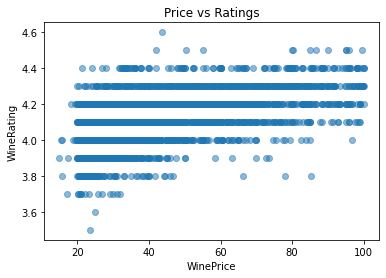

In [104]:
plt.title("Price vs Ratings")
plt.xlabel("WinePrice")
plt.ylabel("WineRating")
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRating"], alpha = 0.5)


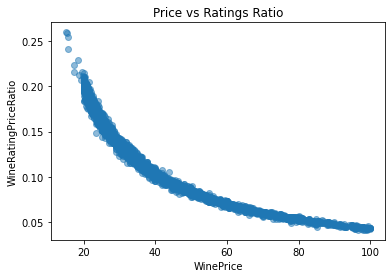

In [105]:
plt.title("Price vs Ratings Ratio")
plt.xlabel("WinePrice")
plt.ylabel("WineRatingPriceRatio")
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRatingPriceRatio"], alpha = 0.5)


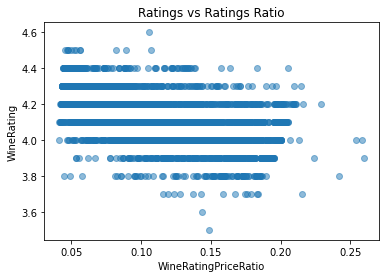

In [106]:
plt.title("Ratings vs Ratings Ratio")
plt.xlabel("WineRatingPriceRatio")
plt.ylabel("WineRating")
plt.scatter(wine_under_100_df["WineRatingPriceRatio"], wine_under_100_df["WineRating"], alpha = 0.5)


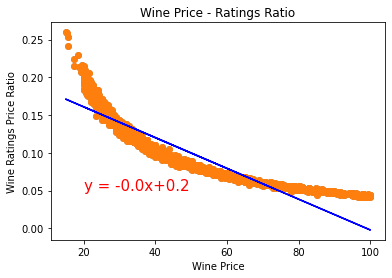

In [107]:
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRatingPriceRatio"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wine_under_100_df["WinePrice"],wine_under_100_df["WineRatingPriceRatio"])
regress_values = (wine_under_100_df["WinePrice"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(wine_under_100_df["WinePrice"],wine_under_100_df["WineRatingPriceRatio"])
plt.plot(wine_under_100_df["WinePrice"],regress_values,"b-")
plt.annotate(line_eq,(20,0.05),fontsize=15,color="red")
plt.title("Wine Price - Ratings Ratio")
plt.xlabel('Wine Price')
plt.ylabel('Wine Ratings Price Ratio')
#plt.savefig('northhem_maxtemp_lat.png')
plt.show()
